In [ ]:
def bisection_method(f, a, b, tol=1e-5, max_iter=100, find_min=True):
    """
    Perform the bisection method to find the minimum or maximum of a function in a given interval.
    
    Parameters:
    f         : The function to be optimized (minimized or maximized).
    a         : Left endpoint of the interval.
    b         : Right endpoint of the interval.
    tol       : Tolerance for stopping criteria.
    max_iter  : Maximum number of iterations.
    find_min  : If True, find the minimum. If False, find the maximum.
    
    Returns:
    c         : The approximate location of the minimum or maximum.
    f(c)      : The function value at c.
    """
    if find_min:
        g = f
    else:
        g = lambda x: -f(x)  # For maximization, minimize the negative of f

    for _ in range(max_iter):
        c = (a + b) / 2.0
        fa, fb, fc = g(a), g(b), g(c)

        if abs(b - a) < tol or abs(fc) < tol:
            return c, f(c)

        if (fa < fc and find_min) or (fa > fc and not find_min):
            b = c
        else:
            a = c

    return c, f(c)

# Example usage
if __name__ == "__main__":
    # Define the function to optimize (example: f(x) = x^2 + 4x + 4)
    def f(x):
        return (x-2)**2
    
    a, b = -10, 10
    min_x, min_f = bisection_method(f, a, b, find_min=True)
    print(f"Minimum at x = {min_x}, f(x) = {min_f}")

    max_x, max_f = bisection_method(f, a, b, find_min=False)
    print(f"Maximum at x = {max_x}, f(x) = {max_f}")

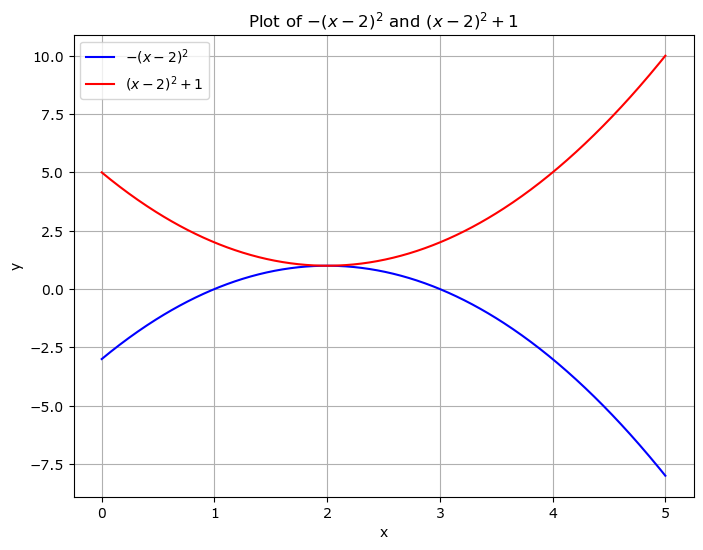

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f1(x):
    return -(x - 2)**2 + 1

def f2(x):
    return (x - 2)**2 + 1

# Generate x values in the interval (0, 5)
x = np.linspace(0, 5, 500)

# Compute y values for both functions
y1 = f1(x)
y2 = f2(x)

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$-(x - 2)^2$', color='blue')
plt.plot(x, y2, label=r'$(x - 2)^2 + 1$', color='red')

# Add labels and title
plt.title('Plot of $-(x - 2)^2$ and $(x - 2)^2 + 1$')
plt.xlabel('x')
plt.ylabel('y')

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import minimize

def powell_method(func, x0, tol=1e-6, max_iter=1000):
    """
    Implements the Powell method for function minimization.
    
    Parameters:
    func : callable
        The objective function to minimize.
    x0 : ndarray
        Initial guess for the variables.
    tol : float
        Tolerance for stopping criteria.
    max_iter : int
        Maximum number of iterations.
    
    Returns:
    result : OptimizeResult
        The optimization result containing the solution and other information.
    """
    
    # Use scipy's built-in minimize function with the Powell method
    result = minimize(func, x0, method='Powell', tol=tol, options={'maxiter': max_iter})
    
    return result

# Example usage:
# Define the function to minimize (e.g., Rosenbrock function)
def rosenbrock(x):
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# Initial guess
x0 = np.array([1.3, 0.7])

# Run the Powell method
result = powell_method(rosenbrock, x0)

# Output the results
print("Solution:", result.x)
print("Function value at the solution:", result.fun)
print("Number of iterations:", result.nit)
print("Success:", result.success)